<img src="matplotlib_logo.png">

## ¿Qué es?

Es una librería de visualización de Python. Se basa en **matplotlib**, de hecho es una interfaz de alto nivel de la misma.

¿Qué ventajas trae respecto de matplotlib?

Es más moderna y se creó para mejorar lo que ya había. Trabaja realmente bien con los objetos **Pandas**. Permite crear gráficos muy estéticos con  pocas líneas de código y está bastante enfocada en gráficos estadísticos.


## Visualización

En esta guía vamos a utilizar vamos a cargar una base de datos y analizarla a partir de gráficos sacados con la librería **Seaborn**. Usaremos distintos tipos de gráficos para mostrar la mayor parte de ellos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# estilo de todos los graficos. Otras opciones: dark, white, whitegrid 
sns.set_style('darkgrid')  
                          
# bbdd: percepcion de felicidad en los diferentes países
df = pd.read_csv(os.path.join(os.getcwd(),'..','datasets', 'Felicidad', '2019.csv'),
                sep = ',')


df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Mapa de calor

Con la idea de estudiar la correlación que existe entre las variables numéricas de la base de datos, vamos a utilizar un mapa de calor, **heatmap()**, sobre la matriz de correlación:

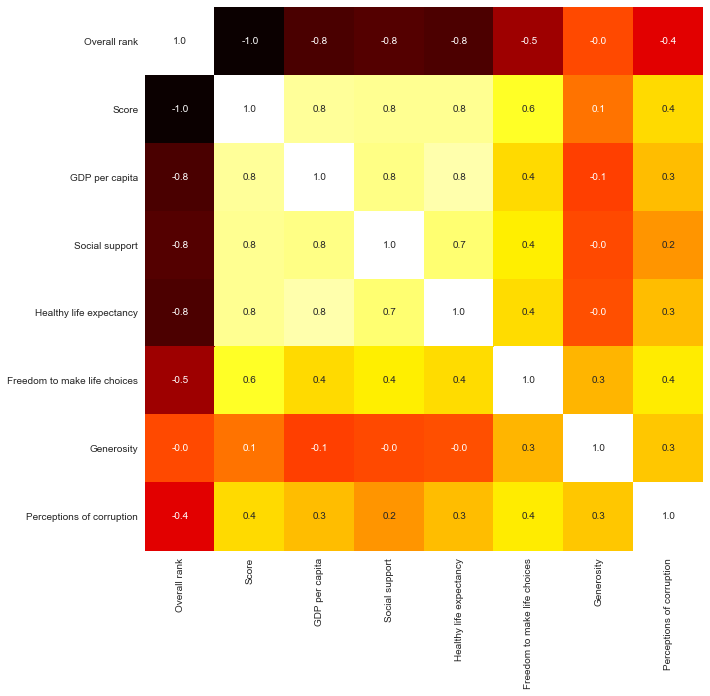

In [3]:
# obtenemos la matriz de correlación
matriz_correlacion = df.corr()

#dibujamos el mapa de calor
figure = plt.figure(figsize = (10,10))
sns.heatmap(matriz_correlacion,      # los datos
           annot = True,             # los valores dentro de las casillas de la matriz
           fmt = '.1f',              # el formato de los valores (1 decimal)     
           cbar = False,             # esconder la barra de color
           cmap = 'hot');            # el mapa de color usado

#### Histograma

El histograma es sin duda una de las visualizaciones que más información nos da sobre la distribucin de una variable. Para mostrar un histograma **no normalizado** usaremos **countplot()**. 

Al no tener en este DataFrame ninguna variable que merezca la pena estudiar con este tipo de gráfico, el cual merece la pena mencionar, vamos a hacer un arreglo modificando una de las variables.

Multiplicaremos la variable **Generosity** * 10 y después nos quedaremos con la **parte entera**, de esta forma habremos **"categorizado"** esta varible y si podrá verse una buena representación de la misma en el histográma:



In [6]:
df['Generosity'] = (df['Generosity'] * 10).astype(np.int)

In [7]:
# Comprobamos que la transformación se ha hecho correctamente
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,1,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,2,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,2,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,3,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,3,0.298


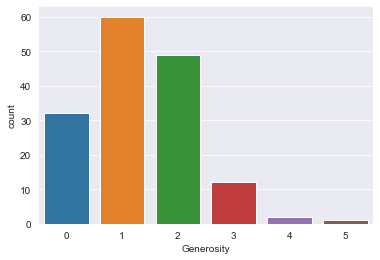

In [9]:
sns.countplot(x = 'Generosity',      # Nombre de la columna del df
              data = df,             # Nombre del df
              orient = 'v',          # orientacion (vertical en este caso)
              );


A lo mejor nos podría interesar más ver la distribución de la variable en un histograma **normalizado**, en este caso nos sirve la función **distplot()** 

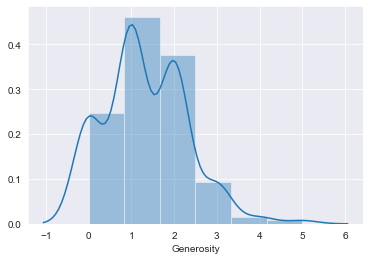

In [16]:
sns.distplot(df['Generosity'],    # Nombre del df
             bins = 6,            # numero de agrupaciones
             hist = True,         # mostramos barras del hist
             kde = True,          # mostramos la función de densidad
             );

#### Gráfico categorico

Vamos a estudiar, según el nivel de generosidad, los valores y la distribución de la variable Score. 

Para esto vamos a utilizar lo que se conoce como **gráfico categórico**. Seaborn nos ofrece varias posibilidades para mostrarnos la información, veamos las optiones más interesantes variando el parámetro **kind**:



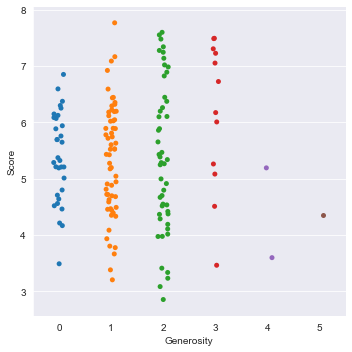

In [39]:
# tipo strip o tira
sns.catplot(x = 'Generosity',
            y = 'Score',
            data = df,
            kind='strip');



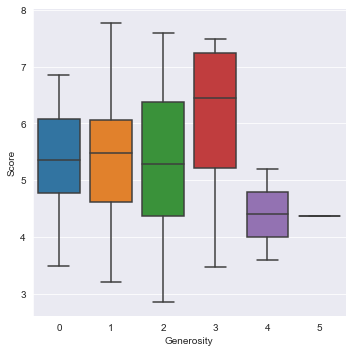

In [41]:
# tipo caja y bigote
# tipico utilizado en estadística.
# Nos permite ver valores atípicos y cuartiles
sns.catplot(x = 'Generosity',
            y = 'Score',
            data = df,
            kind='box');

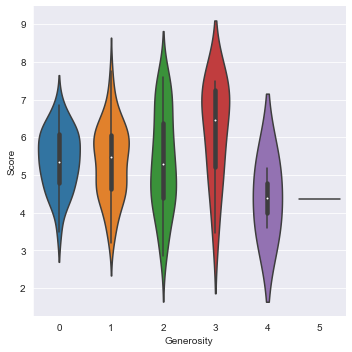

In [40]:
# tipo violin
# combina el diagrama de cajas y bigotes con la densidad
sns.catplot(x = 'Generosity',
            y = 'Score',
            data = df,
            kind='violin');


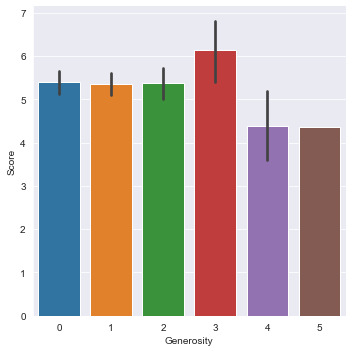

In [43]:
# tipo barra
# nos da una medida de la media junto con una barra de error (desviación)
sns.catplot(x = 'Generosity',
            y = 'Score',
            data = df,
            kind='bar');

#### Gráficos de dispersión

Uno de los tipos de gráfico más empleados. Seaborn ofrece la posibilidad de estimar una regresión lineal sobre los puntos pintados: **lmplot()**.

Vamos a estudiar la relación que existe entre la variable **Freedom to make life choices** y la variable objetivo que en este caso sería **Score**.

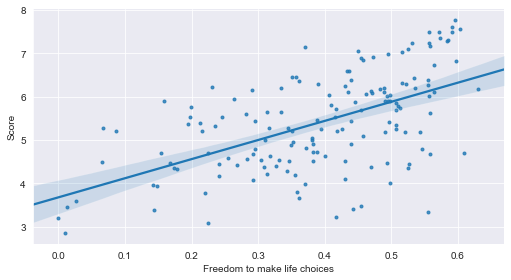

In [65]:
sns.lmplot(x = 'Freedom to make life choices',
           y = 'Score',
           data = df,
           height = 4,       # altura en pulgadas
           aspect = 1.8,     # anchura = altura * aspect
           markers = '.',     # tipo marcador. Igual qe matplotlib
          );

Por defecto se computan los cálculos para realizar la regresión lineal, a lo mejor no nos interesa mostrarla, en ese caso ponemos el parámetro **fit_reg** como False.

Una opción muy interesante es estudiar la dispersión de ciertos puntos, añadiendo una tercera dimensión (otra variable dentro de la función) que se traduce en el uso de colores.

Esto se consigue mediante el parametro **hue**. Vamos a graficar de nuevo esta dispersión, pero teniendo en cuenta nuestra variable categorica creada **Generosity** y vamos a eliminar la línea de la regresión.

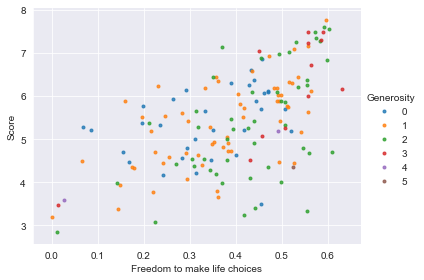

In [69]:
sns.lmplot(x = 'Freedom to make life choices',
           y = 'Score',
           data = df,
           height = 4,       
           aspect = 1.3,     
           markers = '.',  
           fit_reg = False,
           hue = 'Generosity',
           legend = True,
           
          );

#### Diagramas combinados

Existe un tipo de gráfico que combina la información de los gráficos de dispersión/densidad junto con histogramas. Son muy útiles y dan mucha información escribiendo muy poco código: **jointplot**.

A continuación 2 variantes modificando el argumento kind:

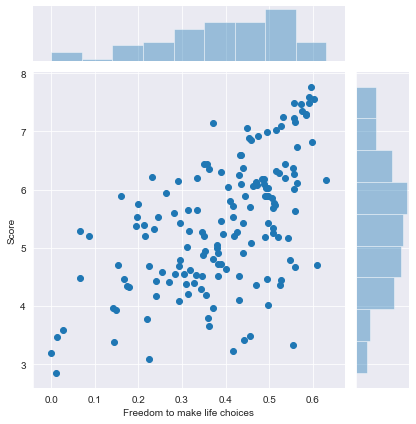

In [83]:
sns.jointplot(x = 'Freedom to make life choices',
           y = 'Score',
           data = df,
           kind='scatter'   # se le puede añadir la reg lineal: reg
           );

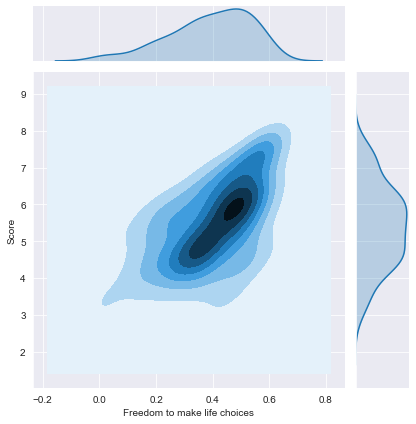

In [84]:
sns.jointplot(x = 'Freedom to make life choices',
           y = 'Score',
           data = df,
           kind='kde'    # función densidad de probabilidad 
           );